In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Running on GPU

In [2]:
#Running on GPU
import cuml

# Reading DataSets

In [3]:
train_path = '../input/analytics-vidhya-jobathon1-2022/train_wn75k28.csv'
test_path = '../input/analytics-vidhya-jobathon1-2022/test_Wf7sxXF.csv'
sub_path = '../input/analytics-vidhya-jobathon1-2022/sample_submission_2zvVjBu.csv'

In [4]:
#train data set
df_train = pd.read_csv(train_path)

#test data set
df_test = pd.read_csv(test_path)

#Sample Submission
df_sub = pd.read_csv(sub_path)

# Simple EDA

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

* Here we can see clearly see the Nan values in the column signup_date and product purchased column.
* Also here most of the columns have dtype as integer and float dtype column.
* So we have to figure out in next sub section how to proceed further

**Checking value counts for all integer columns.**

In [6]:
for column in df_train.select_dtypes('int64').columns:
    print('Value Counts for ',column)
    print(df_train[column].value_counts().sort_index())
    print()
    print()

Value Counts for  id
1        1
2        1
3        1
4        1
5        1
        ..
39157    1
39158    1
39159    1
39160    1
39161    1
Name: id, Length: 39161, dtype: int64


Value Counts for  campaign_var_1
1     1593
2     3486
3     3784
4     4018
5     4060
6     4061
7     3756
8     3407
9     2866
10    2392
11    1873
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64


Value Counts for  campaign_var_2
1      589
2     1788
3     2883
4     4213
5     5250
6     5744
7     5472
8     4690
9     3537
10    2298
11    1410
12     761
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64


Value Counts for  user_activity_var_1
0    23869
1    14917
2      374
3        1
Name: user_activity_var_1, dtype: int64


Value Counts for  user_activity_var_2
0    38898
1      263
Name: user_activity_var_2, dtype: int64


Value Counts for  user_activity_var_3
0    35134
1     4027
Name: user_activity_var_3, dtype: int64


Value Cou

In [7]:
for column in df_test.select_dtypes('int64').columns:
    print('Value Counts for ',column)
    print(df_test[column].value_counts().sort_index())
    print()
    print()

Value Counts for  id
39162    1
39163    1
39164    1
39165    1
39166    1
        ..
52341    1
52342    1
52343    1
52344    1
52345    1
Name: id, Length: 13184, dtype: int64


Value Counts for  campaign_var_1
1      227
2      665
3      860
4     1068
5     1179
6     1259
7     1304
8     1307
9     1160
10    1027
11     921
12     708
13     568
14     440
15     340
16     151
Name: campaign_var_1, dtype: int64


Value Counts for  campaign_var_2
1       33
2      185
3      410
4      783
5     1110
6     1477
7     1775
8     1923
9     1682
10    1481
11    1013
12     698
13     379
14     179
15      56
Name: campaign_var_2, dtype: int64


Value Counts for  user_activity_var_1
0    8207
1    4857
2     119
3       1
Name: user_activity_var_1, dtype: int64


Value Counts for  user_activity_var_2
0    13128
1       56
Name: user_activity_var_2, dtype: int64


Value Counts for  user_activity_var_3
0    11822
1     1362
Name: user_activity_var_3, dtype: int64


Value Counts 

* From the integer data type columns I observe that user_activity_var named columns have few discrete values which might be used as categorical features in long run.
* The features like campaign_var_1 and campaign_var_2 comparatively have more discrete values than the user activity columns. So we will see whether to use this as a categorical or numerical column. 

**Showing Imbalance in the data set**

* This shows the Data set is highly Imbalanced as most of the values in target columns has zero.

<AxesSubplot:title={'center':'target variable'}>

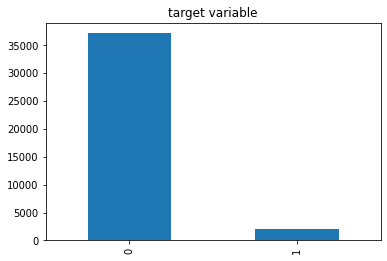

In [8]:
df_train['buy'].value_counts().sort_index().plot(kind = 'bar',title = 'target variable')

In [9]:
df_train['products_purchased'].value_counts().sort_index()

1.0    3643
2.0    8867
3.0    5024
4.0     716
Name: products_purchased, dtype: int64

* Though this column has float data type .But has only few values. So this might be treated as a categorical column.

**Checking for correlation between various vaiables**

<AxesSubplot:>

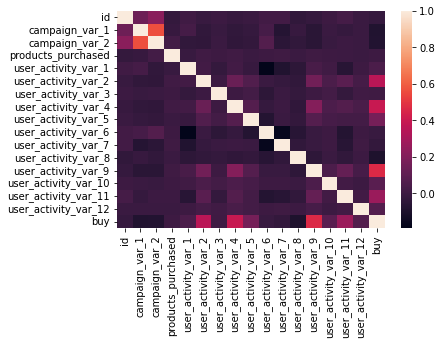

In [10]:
import seaborn as sns
sns.heatmap(df_train.corr())

# Feature Engineering

**Preparing Indicator Features from Features having Nan Values**

* Here I first decided to feature engineered the nan valued columns where I made indicator features from them to indicate that whether there is a nan value or not. In this way I was able to create cate

In [11]:
# Indicator Features preapared from Nan valued column i.e. product_pirchased and signup_date

df_train['indicator_signup_date'] = df_train['signup_date'].isnull()
df_train['indicator_products_purchased'] = df_train['products_purchased'].isnull()
df_test['indicator_signup_date'] = df_test['signup_date'].isnull()
df_test['indicator_products_purchased'] = df_test['products_purchased'].isnull()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['indicator_signup_date'] = le.fit_transform(df_train['indicator_signup_date'].astype(str))  
df_train['indicator_products_purchased'] = le.fit_transform(df_train['indicator_products_purchased'].astype(str))  
df_test['indicator_signup_date'] = le.fit_transform(df_test['indicator_signup_date'].astype(str))  
df_test['indicator_products_purchased'] = le.fit_transform(df_test['indicator_products_purchased'].astype(str)) 

**Converting date time features to date time data type**

In [12]:
df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_train['signup_date'] = pd.to_datetime(df_train['signup_date'])

df_test['created_at'] = pd.to_datetime(df_test['created_at'])
df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])

**Imputing Nan Values of Purchase column with 0**

* I have used mode value imputation strategy for product purchased also used Iterative Imputer , KNN Imputer and Light GBM imputer for this purpose but does not yield great results. Therefore I decided to impute this with zero value imputation strategy as there very high percentage of values in products_purchased column and also we don't know about what value of discrete product puchased value from [1,2,3,4] or any float values like mean therefore zero imputation is something like creating a new category within that column which really helped me to enhace my score 

In [13]:
df_train['products_purchased'] = df_train['products_purchased'].fillna(0)
df_test['products_purchased'] = df_test['products_purchased'].fillna(0)

**Making Combo data for Clustering to make a cluster feature**

In [14]:
combo = pd.concat([df_train.drop('buy',axis=1),df_test], ignore_index=False)
combo.drop(['id','created_at','signup_date'],axis=1,inplace=True)
combo

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,indicator_signup_date,indicator_products_purchased
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,16,12,0.0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
13180,12,8,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
13181,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
13182,14,10,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1,1


**Elbow method for finding optimum clusters**

* What I see in my submissions as I increase the dimension of the data i.e. adding features that separates feature clearly helps me to improve my score.

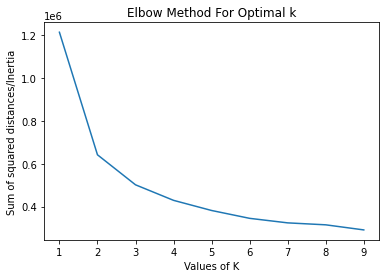

In [15]:
from cuml.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(combo)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

**Clustered Feature Made**

* I have got optimum clusters as 2 and made a new feature on the basis of that.

In [16]:
k_means = KMeans(n_clusters=2)
k_means.fit(combo)

labels = k_means.predict(combo)
combo['label'] = labels

In [17]:
combo['label'].value_counts()

0    29488
1    22857
Name: label, dtype: int64

In [18]:
df_train['label'] = combo['label'].head(df_train.shape[0])
df_test['label'] = combo['label'].tail(df_test.shape[0])

**Total Campaign Var made from two Campaign Variables**

In [19]:
df_train['camapign_var'] = df_train['campaign_var_1'] + df_train['campaign_var_2']
df_test['camapign_var'] = df_test['campaign_var_1'] + df_test['campaign_var_2']

* So here comes the part where I found out various categorical features to be fed into specific categorical columns.

In [20]:
# Preparing Categorical Features

dumm_feat = ['id','created_at','signup_date','buy','camapign_var','campaign_var_1','campaign_var_2'] # ,'products_purchased'
CAT_FEATURE = [feat for feat in df_train.columns if feat not in dumm_feat]
CAT_FEATURE

['products_purchased',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_9',
 'user_activity_var_10',
 'user_activity_var_11',
 'user_activity_var_12',
 'indicator_signup_date',
 'indicator_products_purchased',
 'label']

In [21]:
# coverting categorical features into data type .
for feat in CAT_FEATURE:
    df_train[feat] = df_train[feat].astype('int64')
    df_test[feat] = df_test[feat].astype('int64')

**Some might wonder why I have not used Date columns because the date extracted features yields very less importance in my previous attempts. Therefore I prefer not to  use.**

# Preparing Train and Test

In [22]:
# Dropped Date Columns and id.
train = df_train.copy()
x = train.drop(['id','created_at','signup_date','buy'],axis=1) # 'id',
y = df_train['buy']
test = df_test.drop(['id','created_at','signup_date'],axis=1) # 'id',

In [23]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=101)

# Modelling

**What I understood from EDA and Feature Engineering is that the int columns which are in large number in the dataset will help tree based models give good splits to get good F1 score. Therefore I have used Boosting models like XGB , Light GBM and Catboost(cat_features argument containung categorical columns what I have chosen). I have checked all their validation scores then decided to go for stacking classifier for final prediction.**

**XGB**

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import classification_report

xgbc = XGBClassifier(n_estimators = 39)

xgbc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds_proba_xgbc = xgbc.predict_proba(x_test)
y_test_preds_xgbc = xgbc.predict(x_test)
print()     
print('F1 Score   '+str(f1_score(y_test, y_test_preds_xgbc)))
print()
print(classification_report(y_test, y_test_preds_xgbc))

[0]	validation_0-logloss:0.46173	validation_1-logloss:0.46102
[1]	validation_0-logloss:0.33483	validation_1-logloss:0.33337
[2]	validation_0-logloss:0.25635	validation_1-logloss:0.25446
[3]	validation_0-logloss:0.20505	validation_1-logloss:0.20285
[4]	validation_0-logloss:0.16984	validation_1-logloss:0.16762
[5]	validation_0-logloss:0.14561	validation_1-logloss:0.14360
[6]	validation_0-logloss:0.12855	validation_1-logloss:0.12654
[7]	validation_0-logloss:0.11671	validation_1-logloss:0.11491
[8]	validation_0-logloss:0.10830	validation_1-logloss:0.10660
[9]	validation_0-logloss:0.10226	validation_1-logloss:0.10080
[10]	validation_0-logloss:0.09798	validation_1-logloss:0.09657
[11]	validation_0-logloss:0.09467	validation_1-logloss:0.09350
[12]	validation_0-logloss:0.09183	validation_1-logloss:0.09109
[13]	validation_0-logloss:0.09002	validation_1-logloss:0.08944
[14]	validation_0-logloss:0.08837	validation_1-logloss:0.08819
[15]	validation_0-logloss:0.08730	validation_1-logloss:0.08731
[1

**Catboost**

In [25]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,f1_score

cbc = CatBoostClassifier(eval_metric='TotalF1',cat_features=CAT_FEATURE)

cbc.fit(x_train,y_train,eval_set=(x_test,y_test))

y_test_preds_proba_cbc = cbc.predict_proba(x_test)
y_test_preds_cbc = cbc.predict(x_test)
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_cbc)))
print()
print(classification_report(y_test, y_test_preds_cbc))

Learning rate set to 0.0742
0:	learn: 0.9657494	test: 0.9655778	best: 0.9655778 (0)	total: 117ms	remaining: 1m 57s
1:	learn: 0.9659375	test: 0.9665765	best: 0.9665765 (1)	total: 174ms	remaining: 1m 26s
2:	learn: 0.9657332	test: 0.9657582	best: 0.9665765 (1)	total: 229ms	remaining: 1m 16s
3:	learn: 0.9657494	test: 0.9657582	best: 0.9665765 (1)	total: 286ms	remaining: 1m 11s
4:	learn: 0.9657785	test: 0.9657582	best: 0.9665765 (1)	total: 343ms	remaining: 1m 8s
5:	learn: 0.9657494	test: 0.9657582	best: 0.9665765 (1)	total: 404ms	remaining: 1m 6s
6:	learn: 0.9658369	test: 0.9657582	best: 0.9665765 (1)	total: 449ms	remaining: 1m 3s
7:	learn: 0.9658822	test: 0.9659381	best: 0.9665765 (1)	total: 513ms	remaining: 1m 3s
8:	learn: 0.9660180	test: 0.9662969	best: 0.9665765 (1)	total: 572ms	remaining: 1m 3s
9:	learn: 0.9660180	test: 0.9659381	best: 0.9665765 (1)	total: 617ms	remaining: 1m 1s
10:	learn: 0.9658369	test: 0.9657582	best: 0.9665765 (1)	total: 671ms	remaining: 1m
11:	learn: 0.9666197	tes

**Light Gbm**

In [26]:
import lightgbm as lgb
lgc = lgb.LGBMClassifier()

lgc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds_proba_lgc = lgc.predict_proba(x_test)
y_test_preds_lgc = lgc.predict(x_test)

print('F1 Score   '+str(f1_score(y_test, y_test_preds_lgc)))
print()
print(classification_report(y_test, y_test_preds_lgc))

[1]	training's binary_logloss: 0.151345	valid_1's binary_logloss: 0.150326
[2]	training's binary_logloss: 0.139961	valid_1's binary_logloss: 0.139472
[3]	training's binary_logloss: 0.131671	valid_1's binary_logloss: 0.131499
[4]	training's binary_logloss: 0.12514	valid_1's binary_logloss: 0.125281
[5]	training's binary_logloss: 0.119726	valid_1's binary_logloss: 0.119984
[6]	training's binary_logloss: 0.115184	valid_1's binary_logloss: 0.115529
[7]	training's binary_logloss: 0.111291	valid_1's binary_logloss: 0.111821
[8]	training's binary_logloss: 0.107987	valid_1's binary_logloss: 0.108608
[9]	training's binary_logloss: 0.105088	valid_1's binary_logloss: 0.10579
[10]	training's binary_logloss: 0.102551	valid_1's binary_logloss: 0.103383
[11]	training's binary_logloss: 0.100357	valid_1's binary_logloss: 0.101284
[12]	training's binary_logloss: 0.0984034	valid_1's binary_logloss: 0.0993371
[13]	training's binary_logloss: 0.0966363	valid_1's binary_logloss: 0.0976407
[14]	training's bin

# Stacking Catboost with bagged LightGBM and XGBoost****

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
stk = StackingClassifier([('cbc',CatBoostClassifier(eval_metric='TotalF1',cat_features=CAT_FEATURE)),
                            ('lgc',BaggingClassifier(base_estimator=lgb.LGBMClassifier(),n_estimators=10,random_state=101)),
                            ('xgb',BaggingClassifier(base_estimator=XGBClassifier(),n_estimators=10,random_state=101))])

stk.fit(x_train,y_train)
preds_valid = stk.predict(x_test)

print(classification_report(y_test,preds_valid))

Learning rate set to 0.044843
0:	learn: 0.9657494	total: 73.8ms	remaining: 1m 13s
1:	learn: 0.9659375	total: 171ms	remaining: 1m 25s
2:	learn: 0.9657332	total: 267ms	remaining: 1m 28s
3:	learn: 0.9657494	total: 365ms	remaining: 1m 30s
4:	learn: 0.9657785	total: 430ms	remaining: 1m 25s
5:	learn: 0.9657785	total: 490ms	remaining: 1m 21s
6:	learn: 0.9657624	total: 527ms	remaining: 1m 14s
7:	learn: 0.9658077	total: 586ms	remaining: 1m 12s
8:	learn: 0.9658077	total: 643ms	remaining: 1m 10s
9:	learn: 0.9658077	total: 697ms	remaining: 1m 9s
10:	learn: 0.9657785	total: 750ms	remaining: 1m 7s
11:	learn: 0.9657494	total: 792ms	remaining: 1m 5s
12:	learn: 0.9658077	total: 837ms	remaining: 1m 3s
13:	learn: 0.9658077	total: 892ms	remaining: 1m 2s
14:	learn: 0.9658077	total: 921ms	remaining: 1m
15:	learn: 0.9687473	total: 968ms	remaining: 59.5s
16:	learn: 0.9696751	total: 1.01s	remaining: 58.3s
17:	learn: 0.9704803	total: 1.05s	remaining: 57.5s
18:	learn: 0.9707582	total: 1.09s	remaining: 56.2s
19:	

# Preparation of Submission File

**In my final submission I have used Stacking classifier above for prediction**

In [28]:
preds_test = stk.predict(test)
df_test['buy'] = 0
df_test['buy'] = preds_test

In [29]:
# preds_test = cbc.predict(test)
df_sub['buy']= df_test['buy']

df_sub.to_csv('submission_stack_CBC_bag_LGC_bag_XGB_final.csv',index=False)